# DM872 - MILP Formulations for the Traveling Salesman Problem

## MTZ

The following formulation (C. E. Miller, A. W. Tucker, and R. A. Zemlin,
“Integer programming formulations and traveling salesman problems,” J.
ACM, 7 (1960), pp. 326–329) which also eliminates subtours has only a
polynomial number of constraints. Let $x_{ij}$ be the variables on the
edges with the same meaning as for undirected graphs described above and let $u_{i}$, $i=0,1,\ldots,n-1$ be the
number of cities visited already when we arrive at city $i$. 
$$\begin{aligned}
\min & \sum_{(ij) \in A} c_{ij} x_{ij}\\
&\sum_{i:i\neq j} x_{ij}=1 & \forall j=0,\ldots,n-1 \\
&\sum_{j:i\neq j} x_{ij}=1 &\forall i=0,\ldots,n-1 \\
&u_i - u_j + n x_{ij} \leq n - 1,  &  \forall   i, j = 1,2,\ldots, n-1, i\neq j\\
&x_{ij}\in \mathbb{B} &\forall i,j,i\neq j\\
&u_i\in \mathbb{R} & \forall i = 1,\ldots,n-1
\end{aligned}$$

Note that the third constraint can be equivalently written as:
$$u_i +1 \leq u_j + n (1-x_{ij}),    \qquad i, j = 1, 2,\ldots, n-1, i\neq j $$

Let's fix a vertex, say $0$, to be the home base and for each other vertex $i$ let $u_i$ be an arbitrary real number. 
The $u_i$ variables play a role similar to node potentials in a network and the inequalities involving them serve to eliminate tours that do not begin and end at city $0$ and tours that visit more than $n-1$ cities.
Consider a feasible solution to the TSP: it can be expressed as a permutation of cities, $\pi=(\pi_1=0,\pi_2,\ldots\pi_n,\pi_1=0)$. Hence $x_{\pi_1,\pi_2}=1$. Unless $\pi_2=0$ then there exists $\pi_3$ such that $x_{\pi_2\pi_3}=1$. We proceed in this way until some $\pi_i=0$, which if the solution is feasible happens only at the end of the permutation. The constraint forces $u_{\pi_j}\geq u_{\pi_i}+1$ when $x_{\pi_i,\pi_j}=1$, except when $\pi_{i+1}=0$. Hence an assignment of $\vec u$ can be found when the solution is feasible. On the contrary if there were subtours or a node was visited more than once, then an assignment for the variables $u_i$ that satisfies $u_{\pi_j}\geq u_{\pi_i}+1$ when $x_{\pi_i,\pi_j}=1$ could be found (the constraint would be violated where the subtour closes).


You find an implementation in the `Material/TSP` repository: [mtz.py](https://github.com/DM872/Material/blob/master/TSP/src/mtz.py). Let's try it on the 20-cities random instance.

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmp09x8lgry.glpk.raw
 --wglp /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpnmcqmj0o.glpk.glp
 --cpxlp /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpipypypsc.pyomo.lp
Reading problem data from '/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpipypypsc.pyomo.lp'...
/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpipypypsc.pyomo.lp:3724: warning: lower bound of variable 'x1' redefined
/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpipypypsc.pyomo.lp:3724: warning: upper bound of variable 'x1' redefined
383 rows, 400 columns, 1787 non-zeros
380 integer variables, all of which are binary
4104 lines were read
Writing problem data to '/var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpnmcqmj0o.glpk.glp'...
3356 lines were written
GLPK Integer Optimizer, v4.65
383 rows, 400 columns, 1787 non-zeros
380 integer variables, all of which are 

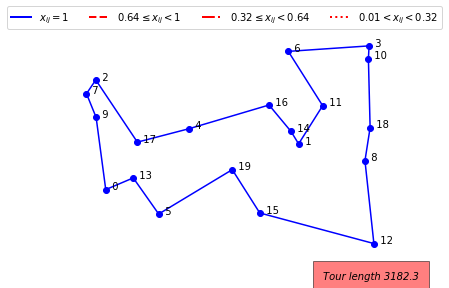

In [4]:
%run src/mtz.py
%matplotlib inline

## Svetska

In JA Svestka, "A continuous variable representation of the TSP," Math Prog, v15, 1978, pp 211-213 a similar flow formulation is presented. The idea is the same as in the MTZ formulation but instead of working with potentials at nodes we have flow $y$ in the arcs. The gain at every node except node 0 can be any value $\epsilon>0$ (differntly from the MTZ formulation where it has been fixed to 1). The formulation is as follows:

$$\begin{aligned}
\min & \sum_{ij \in A} c_{ij} x_{ij}\\
&\sum_{j:j\neq 0} y_{0j}=1 \\
&\sum_{j:j\neq i} y_{ji}\geq 1 &  i=1..n-1\\
&\sum_{j:j\neq i} y_{ij}-\sum_{j:j\neq i} y_{ji}=\epsilon & i=1..n-1 \\
&y_{ij} \leq (1+n\cdot \epsilon)x_{ij} & i,j = 0..n-1\\
&\sum_{ij \in A} x_{ij}\leq n \\
&x_{ij}\in \mathbb{B} &i,j=0..n-1\\
&y_{ij} \geq 0 & i,j = 0..n-1
\end{aligned}
$$

The fourth set of constraints link the non negative variables $y_{ij}$ to the binary variables $x_{ij}$ in such a way that $x_{ij}$ is one when the variable $y_{ij}$ are strictly positive.

With each solution we associate a directed graph $H\subset D$ in which an
arc goes from $i$ to $j$ if and only if $x_{ij}$ is 1. 
To show that $H$ is an Hamiltonian cycle we have to show that:

 (i) $H$ is connected

 (ii) every node in $H$ is entered by at least one arc and left by at least one arc

 (iii) $H$ has at most $n$ arcs.

If each $y_{ij}$ is thought of as a flow from $i$ to $j$ then each node except node $0$ has a gain of $\epsilon$ and so the node $0$ must have a loss of $(n - 1)\epsilon$. Now (i) follows since each connected component of $H$ must have a zero total gain. 
To verify (ii), let us first consider
the node 0. By the first constraint, at least one arc leaves this node; to account for the positive
loss, another arc must enter. In case $i\neq 1$, the second set of conditions guarantee that at
least one arc enters $i$; another arc must leave it to account for the positive gain.
Finally, the property (iii) is tantamount of the fifth constraint. 


You find an implementation in the `Material/TSP` repository: [svestka.py](https://github.com/DM872/Material/blob/master/TSP/src/svestka.py). GLPK is unable to find an upper bound to this formulation within a couple of horus on the 20-cities random instance. Gurobi is instead very fast. We use gurobi therefore.

Using license file /Library/gurobi900/gurobi.lic
Academic license - for non-commercial use only
Read LP format model from file /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpmbg4eiev.pyomo.lp
Reading time = 0.01 seconds
x761: 421 rows, 761 columns, 2243 nonzeros
Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (mac64)
Optimize a model with 421 rows, 761 columns and 2243 nonzeros
Model fingerprint: 0xe0756b41
Variable types: 381 continuous, 380 integer (380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [4e+01, 9e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-01, 2e+01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.01s
Presolved: 420 rows, 760 columns, 2242 nonzeros
Variable types: 380 continuous, 380 integer (380 binary)

Root relaxation: objective 1.032800e+03, 545 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   G

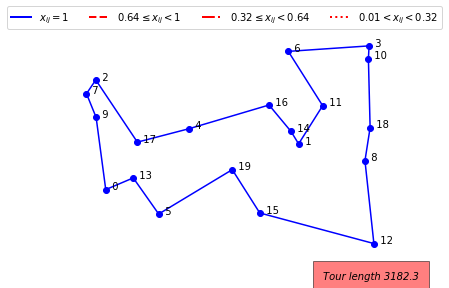

In [15]:
%run src/svestka.py
%matplotlib inline

## Dantzig 

In "Linear Programming and Extensions" 1963, Dantzig G.B. gave a three index formulation for the asymmetric TSP. It considers $n$ different levels indexed by $t$ and looks for tours that visit exactly one node at each level and step up in a coordinated way between levels. 

$$
\begin{aligned}
\min & \sum_{ijt} c_{ij} x_{ijt}\\
&\sum_{t=0}^{n-1}\sum_{j:j\neq i} x_{i,j,t}=1 & i=0..n-1 \\
&\sum_{i:i\neq j} x_{i,j,t}=\sum_{k:k\neq j} x_{i,k,t+1} & j=0..n-1, t=0..n-2\\
&\sum_{i:i\neq j} x_{i,j,n-1}=\sum_{k:k\neq j} x_{i,k,0} & j=0..n-1\\
&x_{ijt}\in \mathbb{B} &i,j=0..n-1\\
\end{aligned}
$$

Here the first set of constraints ensure that every node is visited, the second that the steps are done from the nodes we entered to and the third closes the cycle among the levels.

You find an implementation in the `Material/TSP` repository: [dantzig.py](https://github.com/DM872/Material/blob/master/TSP/src/dantzig.py).

Using license file /Library/gurobi900/gurobi.lic
Academic license - for non-commercial use only
Read LP format model from file /var/folders/w9/sxcp2ljj4wq3fdhy78rf5djh0000gn/T/tmpslxvti6l.pyomo.lp
Reading time = 0.03 seconds
x7601: 421 rows, 7601 columns, 22801 nonzeros
Gurobi Optimizer version 9.0.0 build v9.0.0rc2 (mac64)
Optimize a model with 421 rows, 7601 columns and 22801 nonzeros
Model fingerprint: 0x72b3f570
Variable types: 1 continuous, 7600 integer (7600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 9e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 1 columns
Presolve time: 0.03s
Presolved: 420 rows, 7600 columns, 22800 nonzeros
Variable types: 0 continuous, 7600 integer (7600 binary)

Root relaxation: objective 2.504182e+03, 888 iterations, 0.04 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Bes

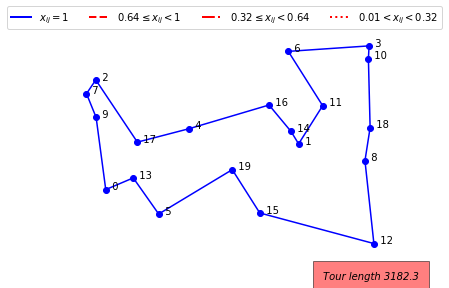

In [14]:
%run src/dantzig.py
%matplotlib inline

## Comparison

Let's compare the different formulations encountered on the basis of their linear relaxation:



| Instance  | DFJ  | MTZ  | Svestka  | Dantzig  |
|---|---|---|---|---|
| ran20points    |   |   |   |   |
| dantzig42.dat    |   |   |   |   |
|berlin52.dat   |   |   |   |   |
| bier127.dat  |   |   |   |   |

Keep now the integrality constraints of the main variables in the formulations so that an optimal solution can be found. Which is the fastest formulation to solve the problem? How many branch and bound nodes are needed in the formulations to find the optimal solution?

Experiment ideas. For example, try combining the two formulations DFJ and MTZ.